# Q1

In [ ]:
1. Write down a 3x3 filter that returns a positive value 
    if the average value of the 4-adjacent neighbors is less than the center and 
    a negative value otherwise. (point 5)

    Answer:
        [[0   , -1/4,    0],
         [-1/4,   1 , -1/4],
         [0   , -1/4,    0]]
        
    If the considered 4-adjacent neighbours are diagonal, then the answer is:
        [[-1/4,    0,  -1/4],
         [0   ,    1,     0],
         [-1/4,    0,  -1/4]]


# Q2

In [ ]:
2. Write a filter that will compute the gradient in the x-direction: (point 5)

    Answer: 
        [0, -1, 1]
        
    But for 2D filter case, the answer can be
       [[0, -1, 1],
        [0, -1, 1],
        [0, -1, 1]]

# Q3

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.fft as fp

In [2]:
image_path = "sample1.jpg"

img = cv2.imread(image_path)
raw_gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(raw_gray_img.shape)

# gray_img = np.zeros((2*raw_gray_img.shape[0], 2*raw_gray_img.shape[1]))
# print(gray_img.shape)
# for i in range(raw_gray_img.shape[0]):
#     for j in range(raw_gray_img.shape[1]):
#         gray_img[2*i,2*j] = raw_gray_img[i,j]

gray_img = raw_gray_img

(241, 321)


# Q3. 1

In [3]:
# horizontal_edge_filter = np.asarray([[ 1,  0, -1],
#                          [ 2,  0, -2],
#                          [ 1,  1, -1]])

horizontal_edge_filter = np.asarray([[ -1,  0, 1],
                                     [ -2,  0, 2],
                                     [ -1,  1, 1]])

# Q3. 2

In [4]:
# verticla_edge_filter = np.asarray(  [[ 1,  2,  1],
#                                      [ 0,  0,  1],
#                                      [-1, -2, -1]])

verticla_edge_filter = np.asarray( [[ 1,  2,  1],
                                    [ 0,  0,  1],
                                    [-1, -2, -1]])

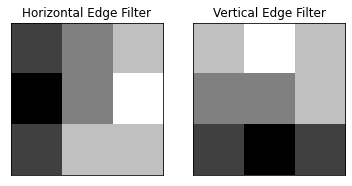

In [5]:
plt.subplot(1,2,1), plt.imshow(horizontal_edge_filter, cmap = 'gray')
plt.title('Horizontal Edge Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(verticla_edge_filter, cmap = 'gray')
plt.title('Vertical Edge Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Horitzontal Filter - Spectrum

<ipython-input-6-eac16a837ad7>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(133), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(horizontal_edge_f))).astype(int), cmap='jet')


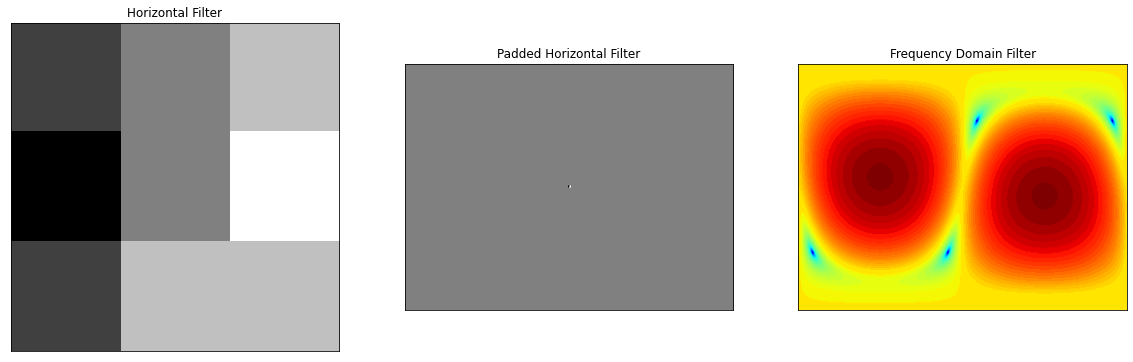

In [6]:
sz = (gray_img.shape[0] - horizontal_edge_filter.shape[0], 
      gray_img.shape[1] - horizontal_edge_filter.shape[1])
padded_horizontal_edge_filter = np.pad(horizontal_edge_filter, 
                                       (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 
                                       'constant')

# horizontal_edge_f = np.fft.fft2(padded_horizontal_edge_filter)
# horizontal_edge_f_shift = np.fft.fftshift(horizontal_edge_f)
# horizontal_edge_magnitude_spectrum = 20*np.log(np.abs(horizontal_edge_f_shift))

horizontal_edge_f = fp.fft2(fp.ifftshift(padded_horizontal_edge_filter))


plt.figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(horizontal_edge_filter, cmap = 'gray')
plt.title('Horizontal Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(padded_horizontal_edge_filter, cmap = 'gray')
plt.title('Padded Horizontal Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(horizontal_edge_f))).astype(int), cmap='jet')
plt.title('Frequency Domain Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Vertical Filter - Spectrum

<ipython-input-7-61ebfe517064>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(133), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(vertical_edge_f))).astype(int), cmap='jet')


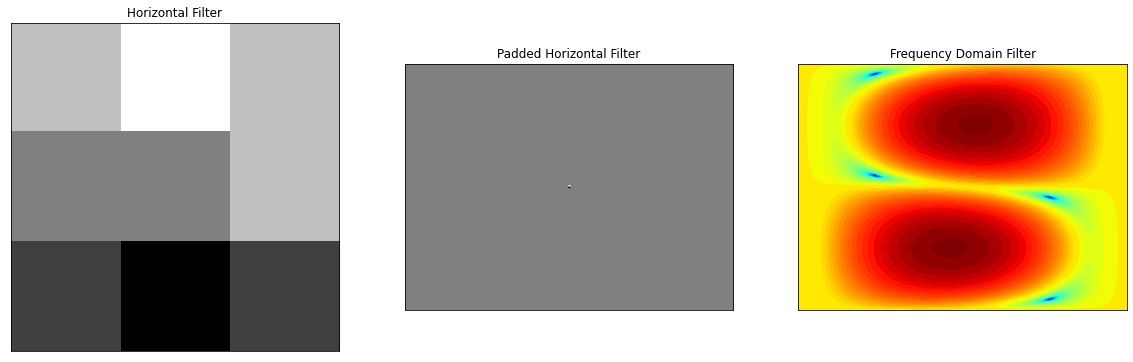

In [7]:
sz = (gray_img.shape[0] - verticla_edge_filter.shape[0], 
      gray_img.shape[1] - verticla_edge_filter.shape[1])
padded_verticla_edge_filter = np.pad(verticla_edge_filter, 
                                       (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 
                                       'constant')

# verticla_edge_f = np.fft.fft2(padded_verticla_edge_filter)
# verticla_edge_f_shift = np.fft.fftshift(verticla_edge_f)
# verticla_edge_magnitude_spectrum = 20*np.log(np.abs(verticla_edge_f_shift))

# plt.figure(figsize=(20, 20))
# plt.subplot(131),plt.imshow(verticla_edge_filter, cmap = 'gray')
# plt.title('Vertical Filter'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(padded_verticla_edge_filter, cmap = 'gray')
# plt.title('Padded Vertical Filter'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(verticla_edge_magnitude_spectrum, cmap = 'gray')
# plt.title('Frequency Domain Filter'), plt.xticks([]), plt.yticks([])
# plt.show()

vertical_edge_f = fp.fft2(fp.ifftshift(padded_verticla_edge_filter))


plt.figure(figsize=(20, 20))
plt.subplot(131),plt.imshow(verticla_edge_filter, cmap = 'gray')
plt.title('Horizontal Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(padded_verticla_edge_filter, cmap = 'gray')
plt.title('Padded Horizontal Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow( (20*np.log10( 0.1 + fp.fftshift(vertical_edge_f))).astype(int), cmap='jet')
plt.title('Frequency Domain Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Q3. 4) Image - Spectrum

<ipython-input-8-0354d8e8aab0>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')


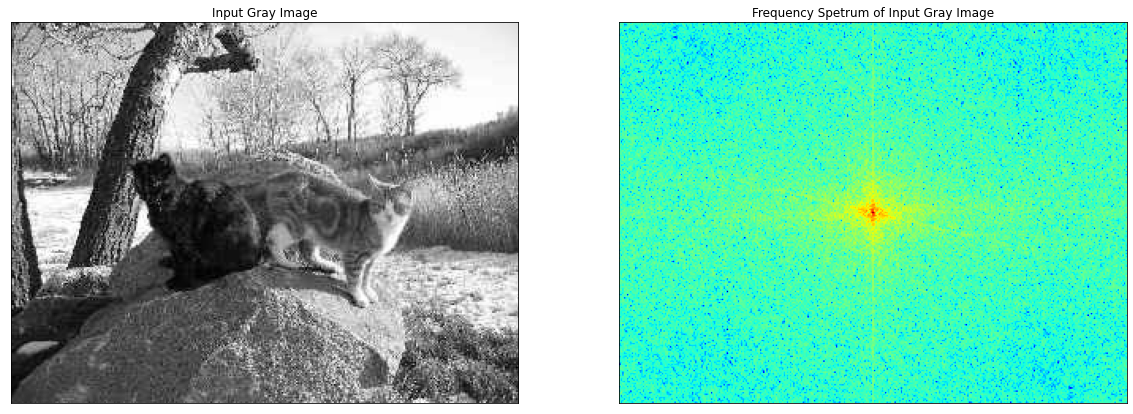

In [8]:
# gray_img_f = np.fft.fft2(gray_img)
# gray_img_f_shift = np.fft.fftshift(gray_img_f)
# gray_img_magnitude_spectrum = 20*np.log(np.abs(gray_img_f_shift))

gray_img_freq = fp.fft2(gray_img)

plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Gray Image'), plt.xticks([]), plt.yticks([])


plt.subplot(122)
# plt.imshow((20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')
plt.title('Frequency Spetrum of Input Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Q3. 5. a) Multiply Horizontal Edge Filter Spetrum with Image Spetrum

<ipython-input-9-aae684c8870f>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')
<ipython-input-9-aae684c8870f>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(horizontal_edge_f))).astype(int), cmap='jet')
<ipython-input-9-aae684c8870f>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(img_h_kernel_freq))).astype(int), cmap='jet')


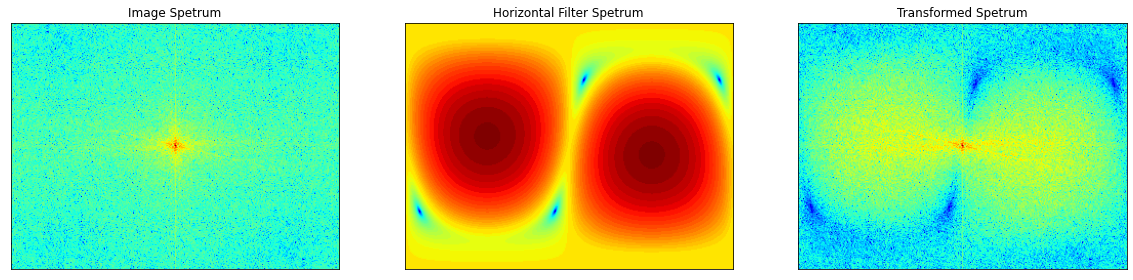

In [9]:
# # horizontal_img_transform = horizontal_edge_magnitude_spectrum * gray_img_magnitude_spectrum
# horizontal_img_f_shift = horizontal_edge_f_shift * gray_img_f
# # horizontal_img_f_shift = horizontal_edge_f_shift * gray_img_f_shift
# horizontal_img_transform = 20*np.log(np.abs(horizontal_img_f_shift))

# horizontal_img_f = horizontal_edge_f * gray_img_f
# horizontal_img_f_shift = np.fft.fftshift(horizontal_img_f)
# horizontal_img_f_magnitude_spectrum = 20*np.log(np.abs(horizontal_img_f_shift))

img_h_kernel_freq = gray_img_freq * horizontal_edge_f # multiply both spectrums in frequency domain


plt.figure(figsize=(20, 20))
plt.subplot(131) #,plt.imshow(gray_img_freq, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')
plt.title('Image Spetrum'), plt.xticks([]), plt.yticks([])

plt.subplot(132) # ,plt.imshow(horizontal_edge_f, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(horizontal_edge_f))).astype(int), cmap='jet')
plt.title('Horizontal Filter Spetrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133) # ,plt.imshow(img_h_kernel_freq, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(img_h_kernel_freq))).astype(int), cmap='jet')
plt.title('Transformed Spetrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Q3. 5. b) Multiply Vertical Edge Filter Spetrum with Image Spetrum

<ipython-input-10-b85e8a485d86>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')
<ipython-input-10-b85e8a485d86>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(vertical_edge_f))).astype(int), cmap='jet')
<ipython-input-10-b85e8a485d86>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(img_v_kernel_freq))).astype(int), cmap='jet')


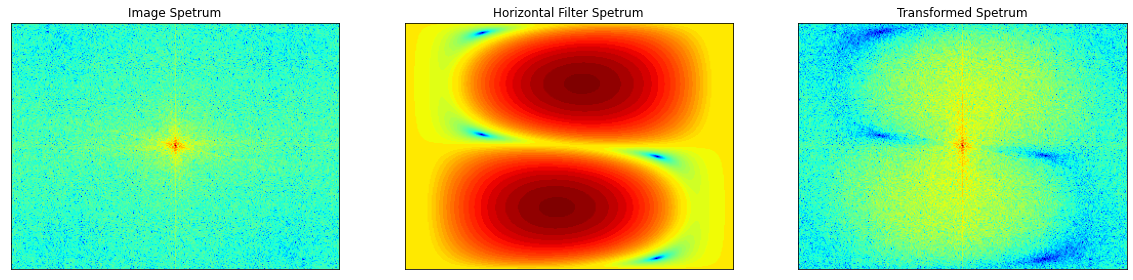

In [10]:
# print(verticla_edge_magnitude_spectrum.shape)
# print(gray_img_magnitude_spectrum.shape)

# # # vertical_img_transform = verticla_edge_magnitude_spectrum * gray_img_magnitude_spectrum
# # # verticla_f_shift = verticla_edge_f_shift * gray_img_f_shift
# # verticla_f_shift = verticla_edge_f_shift * gray_img_f
# # vertical_img_transform = 20*np.log(np.abs(verticla_f_shift))

# # attempt=1
# # vertical_img_f = verticla_edge_f * gray_img_f
# # vertical_img_f_shift = np.fft.fftshift(vertical_img_f)
# # attempt=2
# vertical_img_f = horizontal_edge_f_shift * gray_img_f
# vertical_img_f_shift = np.fft.fftshift(vertical_img_f)
# vertical_img_f_magnitude_spectrum = 20*np.log(np.abs(vertical_img_f_shift))


img_v_kernel_freq = gray_img_freq * vertical_edge_f # multiply both spectrums in frequency domain


plt.figure(figsize=(20, 20))
plt.subplot(131) #,plt.imshow(gray_img_freq, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(gray_img_freq))).astype(int), cmap='jet')
plt.title('Image Spetrum'), plt.xticks([]), plt.yticks([])

plt.subplot(132) # ,plt.imshow(vertical_edge_f, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(vertical_edge_f))).astype(int), cmap='jet')
plt.title('Horizontal Filter Spetrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133) # ,plt.imshow(img_v_kernel_freq, cmap = 'gray')
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(img_v_kernel_freq))).astype(int), cmap='jet')
plt.title('Transformed Spetrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Q3. 6

(241, 321)
(241, 321)


<ipython-input-11-9ee1e463b9dc>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  print(spatial_tranformed_img_h.astype(np.uint8).shape)
<ipython-input-11-9ee1e463b9dc>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_h.astype(np.uint8))


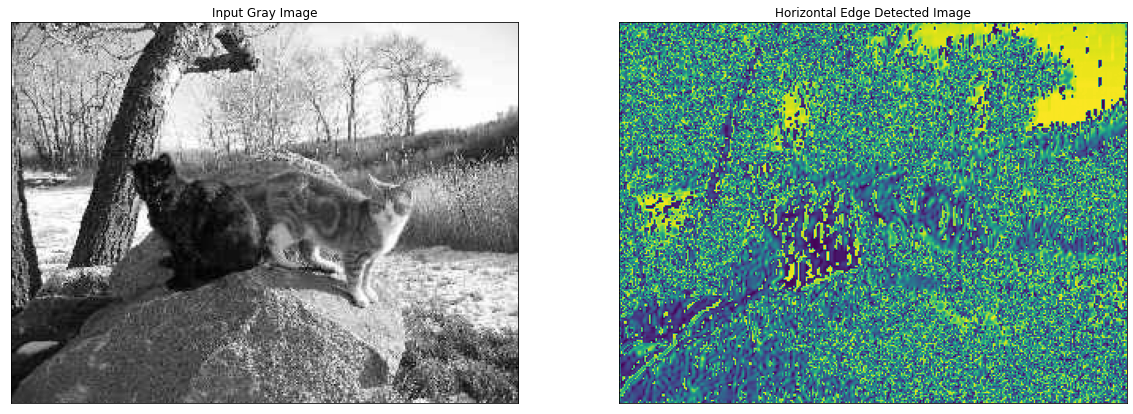

In [11]:
spatial_tranformed_img_h = fp.ifft2(img_h_kernel_freq)


print(gray_img.shape)
print(spatial_tranformed_img_h.astype(np.uint8).shape)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Gray Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
# only real components are used for display
plt.imshow(spatial_tranformed_img_h.astype(np.uint8))
plt.title('Horizontal Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-12-964f158d5aef>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_h.astype(np.uint8), cmap='gray')


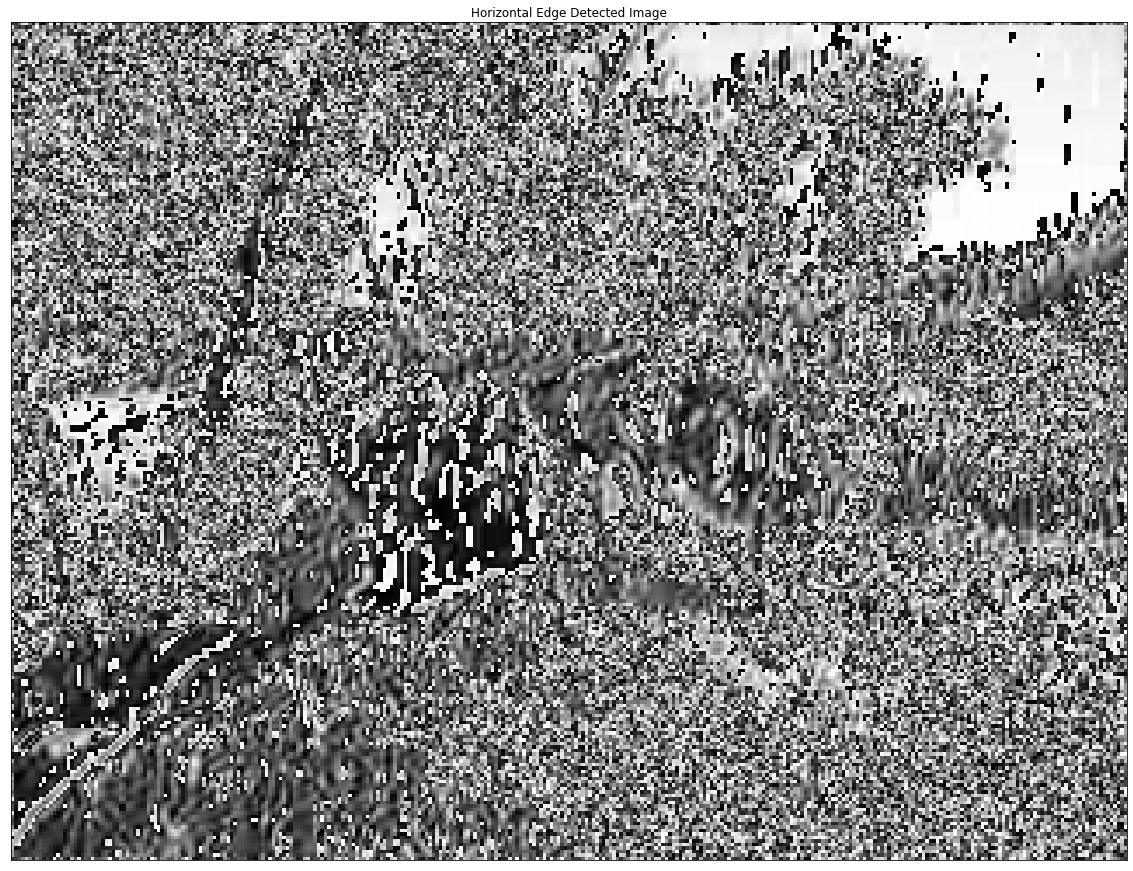

In [12]:
plt.figure(figsize=(20, 20))
plt.imshow(spatial_tranformed_img_h.astype(np.uint8), cmap='gray')
plt.title('Horizontal Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

(241, 321)
(241, 321)


<ipython-input-13-6b0dfdd79fbd>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  print(spatial_tranformed_img_v.astype(np.uint8).shape)
<ipython-input-13-6b0dfdd79fbd>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_v.astype(np.uint8))


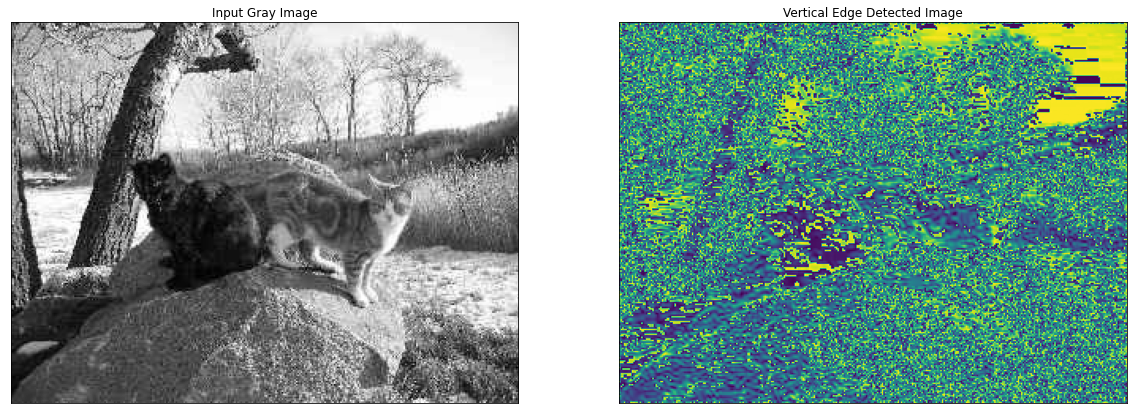

In [13]:
spatial_tranformed_img_v = fp.ifft2(img_v_kernel_freq)


print(gray_img.shape)
print(spatial_tranformed_img_v.astype(np.uint8).shape)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Gray Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
# only real components are used for display
plt.imshow(spatial_tranformed_img_v.astype(np.uint8))
plt.title('Vertical Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-14-542b3872a1bc>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_v.astype(np.uint8), cmap='gray')


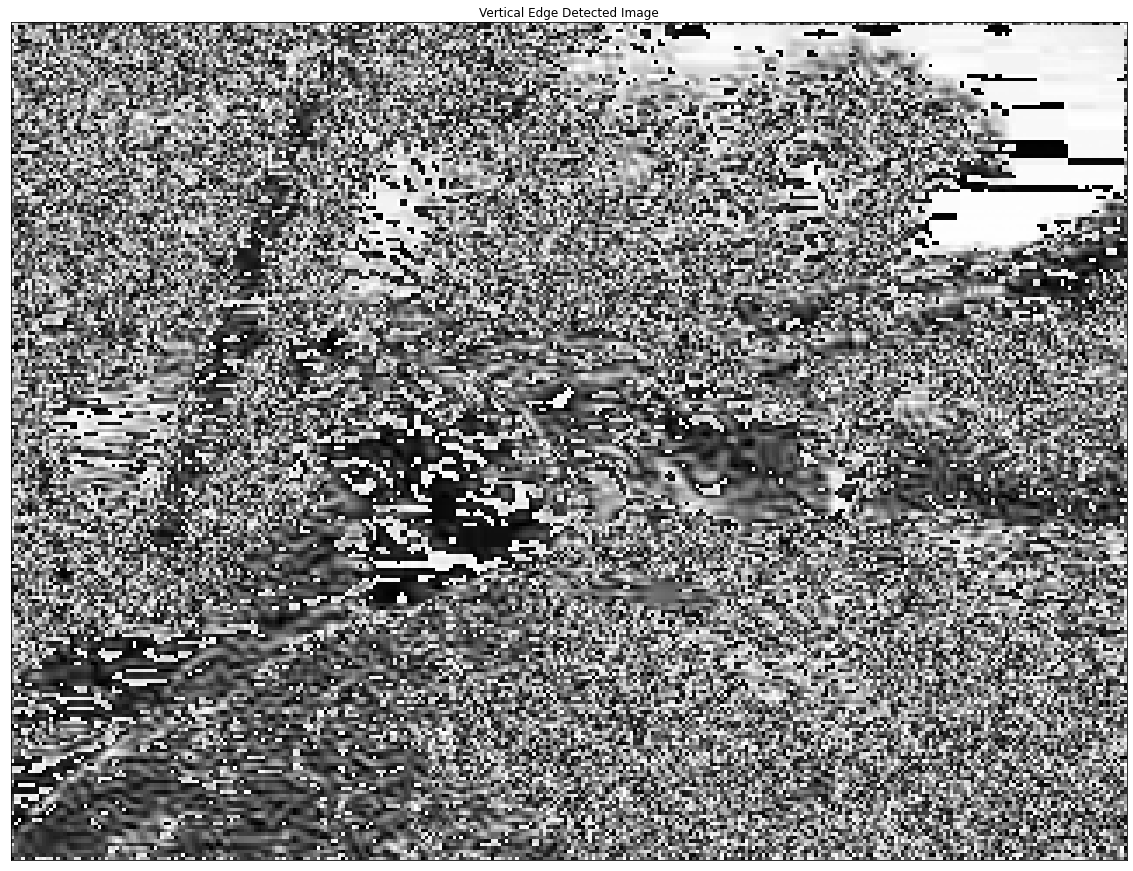

In [14]:
plt.figure(figsize=(20, 20))
plt.imshow(spatial_tranformed_img_v.astype(np.uint8), cmap='gray')
plt.title('Vertical Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Q3. 7

(241, 321)
(241, 321)


<ipython-input-15-fe380404bfad>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  print(spatial_tranformed_img_hv.astype(np.uint8).shape)
<ipython-input-15-fe380404bfad>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_hv.astype(np.uint8))


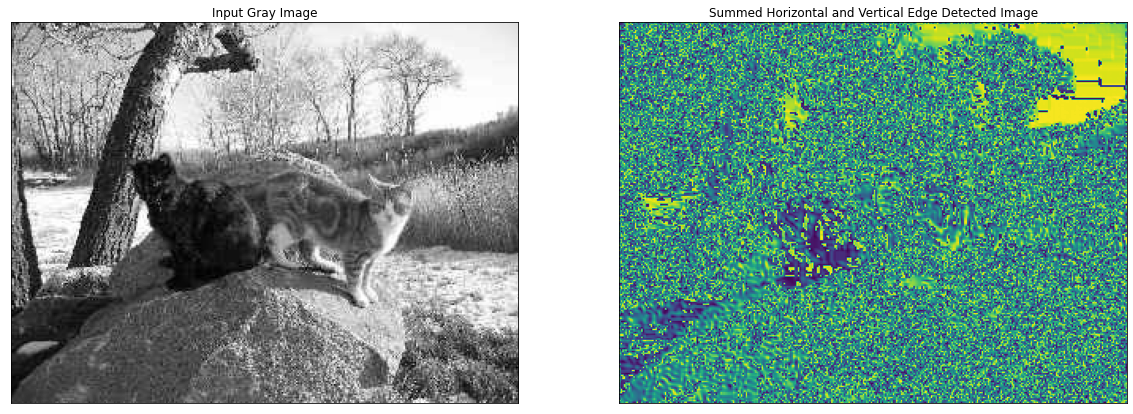

In [15]:
spatial_tranformed_img_hv = spatial_tranformed_img_h + spatial_tranformed_img_v # Summing up horizontal & vertical edges in frequencey domain


print(gray_img.shape)
print(spatial_tranformed_img_hv.astype(np.uint8).shape)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Gray Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
# only real components are used for display
plt.imshow(spatial_tranformed_img_hv.astype(np.uint8))
plt.title('Summed Horizontal and Vertical Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-16-faed143016b5>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(spatial_tranformed_img_hv.astype(np.uint8), cmap='gray')


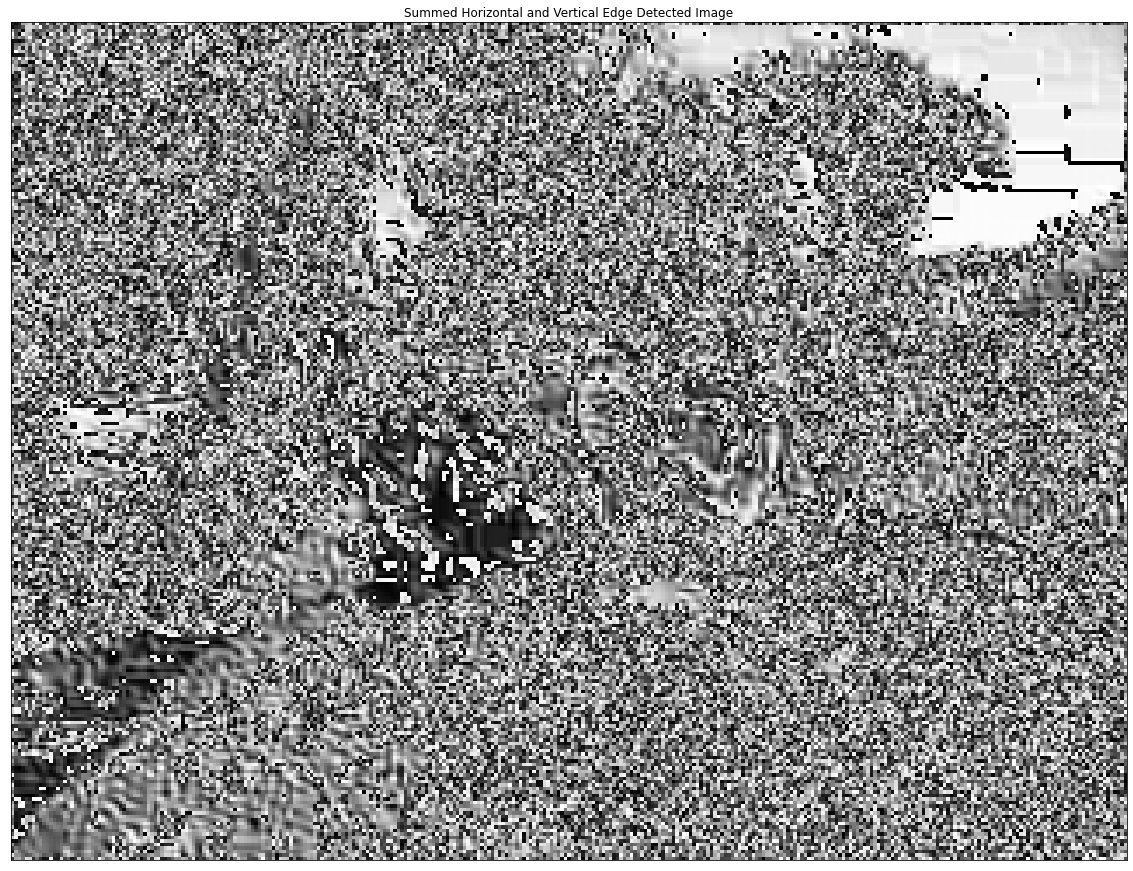

In [16]:
plt.figure(figsize=(20, 20))
plt.imshow(spatial_tranformed_img_hv.astype(np.uint8), cmap='gray')
plt.title('Summed Horizontal and Vertical Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()